<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Aditya, my name is Dmitrii. I'm going to review your project! Nice to meet you! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.

No critical issues are left, so your project has been accepted. Congratulations! However, I want to send it back to you in case you have any questions along the way or you want to make additional changes to the project.

And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

There is the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate.

The data on 500 Megaline clients are considered: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.

The purpose of the study: to analyze clients' behavior, carry out a preliminary analysis of the prepaid plans and determine which one brings in more revenue in order to adjust the advertising budget.

Table of contents:

- [Chapter 1: Open the data files and study the general information](#1.-Open-the-data-files-and-study-the-general-information)
- [Chapter 2: Preprocessing the data](#2.-Preprocessing-the-data)
- [Chapter 3: Analyze Customer Behaviour](#3.-Analyze-Customer-Behaviour)
- [Chapter 4: Analyzing the Revenue and Test the Hypotheses](#4.-Analyzing-the-Revenue-and-Test-the-Hypotheses)
- [Chapter 5: Overall Conclusion](#5.-Overall-Conclusion)

#### Description of plans

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

__Surf__

Monthly charge: \\$20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

__Ultimate__

Monthly charge: \\$70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message1: 1 cent
1 GB of data: $7

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

In [1]:
import pandas as pd
import numpy as np
import math
!pip install matplotlib==3.2.0 --user 

#we use this as since matplotlib 3.3.0 release matplotlib started enforcing that 
#the number of ticklabels matches the number of tick locations.
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from functools import reduce

In [2]:
#some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

## 1. Open the data files and study the general information

In [3]:
try:
    data_calls = pd.read_csv('C:/Users/SkyNET/Desktop/Learn python/Projects/SDA/megaline_calls.csv')
    data_internet = pd.read_csv('C:/Users/SkyNET/Desktop/Learn python/Projects/SDA/megaline_internet.csv')
    data_messages = pd.read_csv('C:/Users/SkyNET/Desktop/Learn python/Projects/SDA/megaline_messages.csv')
    data_plans = pd.read_csv('C:/Users/SkyNET/Desktop/Learn python/Projects/SDA/megaline_plans.csv')
    data_users = pd.read_csv('C:/Users/SkyNET/Desktop/Learn python/Projects/SDA/megaline_users.csv')


except:
    data_calls = pd.read_csv('/datasets/megaline_calls.csv')
    data_internet = pd.read_csv('/datasets/megaline_internet.csv')
    data_messages = pd.read_csv('/datasets/megaline_messages.csv')
    data_plans = pd.read_csv('/datasets/megaline_plans.csv')
    data_users = pd.read_csv('/datasets/megaline_users.csv')



Let us create a list of the tables and their descriptions. And then we have a look at the general information.

In [4]:
#creating the list of tables and their descriptions
dfs_list = [data_users, data_calls, data_messages, data_internet, data_plans]
table_description = ['customer data', 'calls', 'text messages', 'web traffic', 'the prepaid plans'] 

#looking at the data's general information.
print(BOLD + 'General information' + END)
for df, name in zip(dfs_list, table_description):
    print(BOLD + 'The table containing information about ' + name + ':' + END)
    print(df.info())
    print()
    
#looking at the first few rows in a table    
for df, name in zip(dfs_list, table_description):
    print(BOLD + 'The first rows in the table containing information about ' + name + ':' + END)
    display(df.head())
    print()

General information
The table containing information about customer data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

The table containing information about calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3  

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



The first rows in the table containing information about calls:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



The first rows in the table containing information about text messages:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



The first rows in the table containing information about web traffic:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



The first rows in the table containing information about the prepaid plans:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The first four tables contain information about 500 customers who made 137735 calls, sent 76051 text messages and opened 104825 sessions on the Internet. The last table contains information about two calling plans.

Only the *'churn_date'* column of the table with customers info have missing values and there are quite a few of them. Thus, most of the customers continue to use the operator's services and this date has not been determined for them.

For the columns *'age'* of the table with customers info int64 is used. It seems excessive and would be enough int8. For the *'reg_date', 'churn_date', 'call_date', 'message_date'* and *'session_date'* columns, it's nessecary to change the type to datetime to make it convenient to work with dates.

We also need to consider that __Megaline__ round up seconds to minutes for calls, and we need to apply this on the *'duration'* column before moving ahead.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Good start and first view on data! 


In [5]:
data_calls['duration']=np.ceil(data_calls['duration'])
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
- Ok, great job! You can also use here np.ceil () function.

- This function by the way also works without `apply` which makes code shorter and faster.

```
calls['duration'] = np.ceil(calls['duration'])
```

<div class="alert alert-info"> <b>Student comments:</b>I have changed the code to what you said</div>

Now let's look at the values that take numerical features.

Numerical features
The 'age' column in the table containing customer data:


,count,mean,std,min,25%,50%,75%,max
age,500.0,45.5,17.0,18.0,30.0,46.0,61.0,75.0



The 'duration' column in the table containing calls data:


,count,mean,std,min,25%,50%,75%,max
duration,137735.0,7.1,6.0,0.0,2.0,6.0,11.0,38.0



The 'mb_used' column in the table containing web traffic data:


,count,mean,std,min,25%,50%,75%,max
mb_used,104825.0,366.7,277.2,0.0,136.1,344.0,554.6,1693.5



Histograms for numerical features


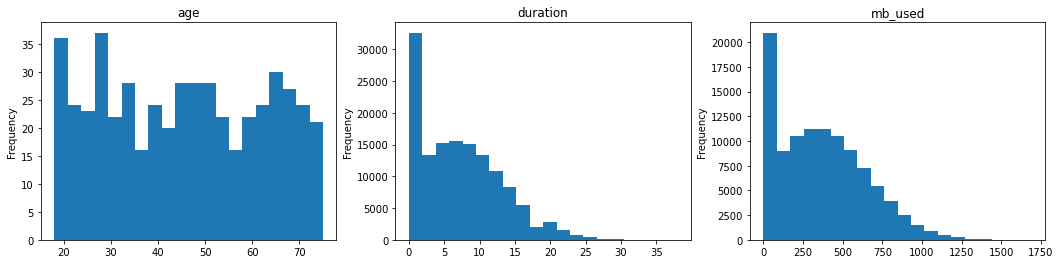

In [6]:
#creating the corresponding lists of tables and columns
num_tables = [data_users, data_calls, data_internet]
num_cols = ['age', 'duration', 'mb_used']
num_table_description = ['customer data', 'calls data', 'web traffic data']

print(BOLD + 'Numerical features' + END)
#looking at the values that take numerical features 
for table, col, description in zip(num_tables, num_cols, num_table_description):
    print(BOLD + "The '" + col + "' column in the table containing " + description + ':' + END)
    display(round(table[[col]].describe(), 1).T)
    print()

#function to plot several histograms in one line
def hist_in_row(tables, cols, bins_num=None):
    cols_num = len(cols)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, (table, col) in enumerate(zip(tables, cols)):
        axes[i%cols_num].hist(x=col, data=table, bins=bins_num)
        axes[i%cols_num].set_title(col)
        axes[i%cols_num].set_ylabel('Frequency')

print(BOLD + 'Histograms for numerical features' + END)
hist_in_row(num_tables, num_cols, 20)

The dataset contains data about customers between the ages of 18 and 75. The feature *'age'* seems to be uniformly distributed across the sample.

Customers talk on the phone for 6-7 minutes on average and there are a lot of missed calls (assuming that a call duration of 0 minutes corresponds to a missed call, given that the provider is rounds seconds up to minutes). The maximum call duration is almost 38 minutes.

Customers download 350 MB of data per session on average. There are also a lot of sessions with zero traffic, possibly due to the fact that individual web sessions are not rounded up. The maximum traffic per session was slightly more than 1.5 GB.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you've added a solution for zero-based data.

On a real project, of course, you can always find out the reason for such zeros. But in this case, it is enough to consider the alternatives and the impact of each decision.

Let's look at shares of missed calls and sessions with zero web traffic. And the shares of customers by calling plans and by activities of using mobile networks as well.

The percent of missing calls is 19.5%

The percent of missing calls of a customer by calling plans:


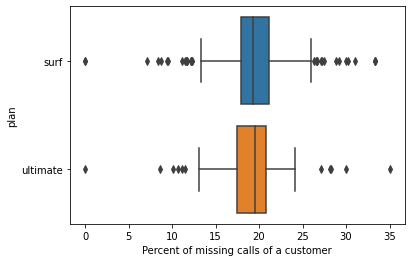

The percent of session with zero traffic is 13.1%
The percent of session with zero traffic by calling plans:


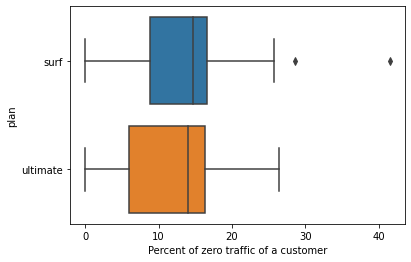


The share of customers by calling plans:


,number of customers,percent of customers
surf,339,67.8
ultimate,161,32.2



The share of customers by activities:


,number of customers,percent of customers
calls,481,96.2
messages,402,80.4
internet,489,97.8


In [7]:
print(BOLD + 'The percent of missing calls is ' + END + '{:.1%}'\
          .format(len(data_calls[data_calls.duration==0])/len(data_calls)))
print()

#Let's look at percent of missing calls of a user by calling plans
print(BOLD + 'The percent of missing calls of a customer by calling plans:' + END)
perc_missing_calls_by_users = (data_calls[data_calls.duration==0].user_id.value_counts()\
                                   /data_calls.user_id.value_counts()*100).fillna(0)
ax = sns.boxplot(x=perc_missing_calls_by_users,
                 y='plan', data=data_calls.merge(data_users, on='user_id', how='left').sort_values('plan'));
ax.set_xlabel('Percent of missing calls of a customer');
plt.show()

print(BOLD + 'The percent of session with zero traffic is ' + END + '{:.1%}'\
          .format(len(data_internet[data_internet.mb_used==0])/len(data_internet)))
print(BOLD + 'The percent of session with zero traffic by calling plans:' + END)
perc_zero_traffic_by_users = (data_internet[data_internet.mb_used==0].user_id.value_counts()\
                                   /data_internet.user_id.value_counts()*100).fillna(0)
ax = sns.boxplot(x=perc_zero_traffic_by_users,
                 y='plan', data=data_internet.merge(data_users, on='user_id', how='left').sort_values('plan'));
ax.set_xlabel('Percent of zero traffic of a customer');
plt.show()
print()

#looking at the number and percentage of customers by calling plans
print(BOLD + 'The share of customers by calling plans:' + END)
display(pd.DataFrame({'number of customers': data_users.plan.value_counts(),
                    'percent of customers': round(data_users.plan.value_counts() * 100 / len(data_users), 1)}))
print()

#function to calculate number and percentage of users in a table
def get_num_and_perc_of_users(df):
    return [len(df.user_id.unique()), len(df.user_id.unique())/len(data_users)*100]

#looking at the number and percentage of customers by activities
print(BOLD + 'The share of customers by activities:' + END)
display(pd.DataFrame([get_num_and_perc_of_users(data_calls),
                    get_num_and_perc_of_users(data_messages),
                    get_num_and_perc_of_users(data_internet)],
                    index = ['calls', 'messages', 'internet'],
                    columns=['number of customers', 'percent of customers']))

he share of missed calls is quite large - 19.5%. Moreover, the typical share of missed calls of a customer varies from 15 to 25% regardless of the calling plan, which seems to be a rather large value. It may be worth checking the network coverage for customers under consideration or finding out other reasons for this.

The percentage of sessions with zero traffic is also not small, it might be worth looking at the source or type of traffic.

Among the customers of the dataset, 68% of customers use the Surf prepaid plan, and the rest - Ultimate.

4% of customers don't make calls, 2% of customers don't use mobile internet, and 20% of customers don't send text messages.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! You completed a very detailed eda. 

### Conclusion

The dataset contains information about 500 customers, more than 135 thousand of their calls, more than 76 thousand of their text messages and almost 105 thousand of their sessions on the Internet.

Customers are between 18 and 75 years old. All age groups are equally represented. On average, they speak on the phone for 6-7 minutes and spend 350 MB of mobile traffic per session. 20% of customers don't send text messages.

32% of customers have the Ultimate prepaid plan and, accordingly, 68% have the Surf prepaid plan.

There is a large percent of missed calls. It makes sense to check the coverage of network for users or identify possible reasons of this. It is also worth looking at sessions with zero mobile traffic, the share of which is also not small.

Missing values are contained in only one column *'churn_date'* in the table with information about the clients. The values are only for those customers who have stopped using the services of the telecom operator, for other customers the value is not defined. Accordingly, these unknown values do not need to be filled.

In addition, the type of the column *'age'* can be converted to the type int8, the types of *'reg_date', 'churn_date', 'call_date', 'message_date'* and *'session_date'* columns to datetime.

## 2. Preprocessing the data

First off, we do the datatype change.

In [8]:
#converting excess type with help of astype() method:
data_users['age'] = data_users.age.astype('int8') 


#converting to datatime type :
data_users['reg_date'] = pd.to_datetime(data_users.reg_date, format='%Y-%m-%d') 
data_users['churn_date'] = pd.to_datetime(data_users.churn_date, format='%Y-%m-%d') 
data_calls['call_date'] = pd.to_datetime(data_calls.call_date, format='%Y-%m-%d') 
data_messages['message_date'] = pd.to_datetime(data_messages.message_date, format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet.session_date, format='%Y-%m-%d')

Let us examine the data range in the dataset after the type change.

In [9]:
tables_list = [data_users, data_users, data_calls, data_messages, data_internet]
date_cols = ['reg_date', 'churn_date', 'call_date', 'message_date', 'session_date']

print(BOLD + 'Date range in the dataset:' + END)
for table, date_col in zip(tables_list, date_cols):
    display(table[[date_col]].agg(['min', 'max']))

Date range in the dataset:


,reg_date
min,2018-01-01
max,2018-12-31


,churn_date
min,2018-07-31
max,2018-12-31


,call_date
min,2018-01-15
max,2018-12-31


,message_date
min,2018-01-15
max,2018-12-31


,session_date
min,2018-01-15
max,2018-12-31


The dataset contains data about customers who subscriped from January 1 to December 31, 2018. They started using the services on January 15th. Customers started churning on July 31st.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
It is indeed very helpful to double-check whether if we have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

Let's look at the data by month.

Amount of data by month:


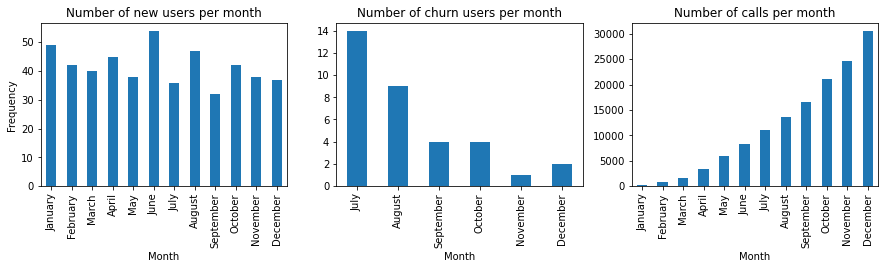

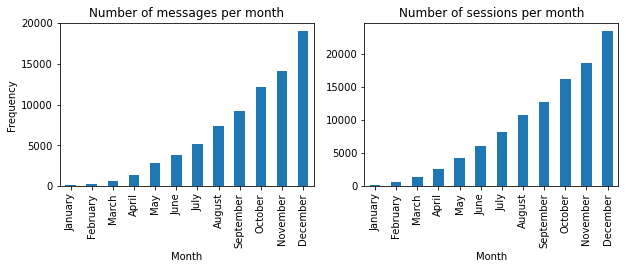

In [10]:
print(BOLD + 'Amount of data by month:' + END)
descriptions = ['new users', 'churn users', 'calls', 'messages', 'sessions']



for i, (table, date_col, descr) in enumerate(zip(tables_list, date_cols, descriptions)):
    if i % 3 == 0:
        cols_num = 3 if i==0 else 2
        fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
        axes[i%3].set_ylabel('Frequency');
    table[date_col].dt.month.value_counts(sort=False).plot(kind='bar', ax=axes[i%3]);
    axes[i%3].set_xlabel('Month');
    axes[i%3].set_title('Number of ' + descr + ' per month');
    axes[i%3].set_xticklabels(table[date_col].sort_values().dt.strftime('%B').unique());
    

About 40 new customers are added evenly every month, which increase the number of calls, text messages and sessions on the Internet every month. The unevenness of the data by months may cause a shift in some results, it is necessary to pay attention to this. User churn started in July and gradually declined towards the end of the year.

### Additional Calculations

Let us calculate the monthly data and merge that with user data and plan info.

In [11]:
#Calculation of the number of calls made and minutes used per month
calls_monthly = data_calls.pivot_table(index=['user_id', data_calls['call_date'].dt.month],\
                                  values='duration',\
                                  aggfunc=['count', 'sum']) 
calls_monthly.reset_index(inplace=True)
calls_monthly.columns = ['user_id', 'month', 'calls_count', 'calls_duration']
print(BOLD + 'Monthly data for calls:' + END)
display(calls_monthly.head())
print()

#Calculation of the number of text messages sent per month
messages_monthly = data_messages.pivot_table(index=['user_id', data_messages['message_date'].dt.month],\
                                  values='message_date',\
                                  aggfunc=['count']) 
messages_monthly.reset_index(inplace=True)
messages_monthly.columns = ['user_id', 'month', 'messages_count']
print(BOLD + 'Monthly data for messages:' + END)
display(messages_monthly.head())
print()

#Calculation of the volume of data per month
internet_monthly = data_internet.pivot_table(index=['user_id', data_internet['session_date'].dt.month],\
                                  values='mb_used',\
                                  aggfunc=['sum']) 
internet_monthly.reset_index(inplace=True)
internet_monthly.columns = ['user_id', 'month', 'data_volume']

#Rounding up the total traffic volume for the month 
internet_monthly['data_volume'] = (internet_monthly.data_volume/1024).apply(np.ceil)

#Converted data volume allowance to GB
data_plans['gb_per_month_included'] = data_plans.mb_per_month_included / 1024
print(BOLD + 'Monthly data for web traffic volume:' + END)
display(internet_monthly.head())
print()

#Merging monthly data with user data and prepaid plan info 
data_frames = [calls_monthly, messages_monthly, internet_monthly]
monthly_activities = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'),
                            data_frames).fillna(0.0)
data = data_users.merge(monthly_activities, on='user_id').merge(data_plans, left_on='plan', right_on='plan_name')


Monthly data for calls:


,user_id,month,calls_count,calls_duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0



Monthly data for messages:


,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36



Monthly data for web traffic volume:


,user_id,month,data_volume
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Awesome! `how = 'outer' can be used here to prevent data loss.
    

We also calculate the monthly revenue here.

In [12]:
data['revenue'] = data.usd_monthly_pay \
    + np.where(data.calls_duration > data.minutes_included, \
               (data.calls_duration - data.minutes_included) * data.usd_per_minute,
               0)\
    + np.where(data.messages_count > data.messages_included,\
               (data.messages_count - data.messages_included) * data.usd_per_message, 
               0)\
    + np.where(data.data_volume > data.gb_per_month_included,\
               (data.data_volume - data.gb_per_month_included) * data.usd_per_gb,
               0)

print(BOLD + 'Merged monthly data with user data:' + END)
display(data.head())

Merged monthly data with user data:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,calls_count,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,16.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,2.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12,9.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,84.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,10,71.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,11,63.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.0


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here! Great, that you created a function to calculate revenue and applied np.where here. 

Btw it is also possible to make the calculation of revenue using  `.clip ()` (useful function in many tasks). 
total5 ['gb_surcharge'] = (total5 ['gb_used'] - total5 ['gb_per_month_included']). clip (0) * total5 ['usd_per_gb']

### Conclusion

The necessary type conversions have been made, including the datetime data type conversions.

Then, for features of type datetime, the distribution of data by date was examined. Thus, the date set contains customer data for 2018. Approximately the same number of users, about 40, is added every month. Accordingly, the number of calls, text messages and traffic volume is increasing due to them.

Additionally, for further analysis, monthly data on calls, text messages and the volume of web traffic for each user and also monthly revenue from each user were calculated.

## 3. Analyze Customer Behaviour

Let us look at customers' activities and their requirements per month.

Desciptive statistics for monthly activities by calling plans:
Surf


,min,max,mean,median,std,var
calls_duration,0.0,1510.0,428.7,425.0,234.5,54968.3
messages_count,0.0,266.0,31.2,24.0,33.6,1126.7
data_volume,0.0,70.0,16.7,17.0,7.8,61.6



Ultimate


,min,max,mean,median,std,var
calls_duration,0.0,1369.0,430.4,424.0,240.5,57844.5
messages_count,0.0,166.0,37.6,30.0,34.8,1208.8
data_volume,0.0,46.0,17.3,17.0,7.7,58.8



Destribution of features corresponding to customer monthly activities by calling plans:
Surf


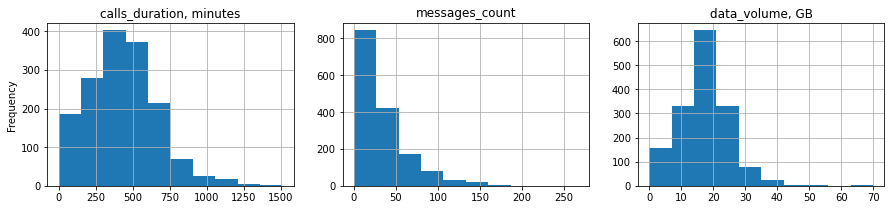

Ultimate


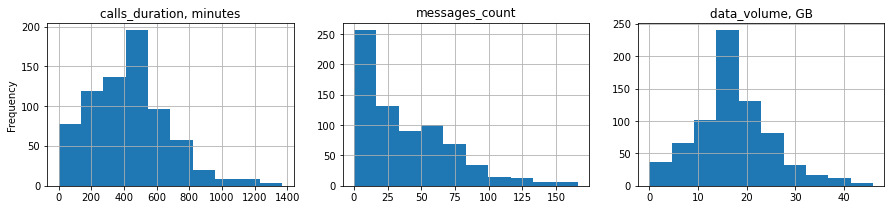

In [13]:
#creating the corresponding list with activities
activities = ['calls_duration', 'messages_count', 'data_volume']

#looking at the descriptive statistics for each type of activity by calling plans
print(BOLD + 'Desciptive statistics for monthly activities by calling plans:' + END)
for name, group_data in data.groupby('plan'):
    print(BOLD + name.capitalize() + END)
    display(group_data[activities].agg(['min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
    print()

#function to plot several histograms in one line
def hist_in_row(data, features, description):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, (feature, descr) in enumerate(zip(features, description)):
        data[feature].hist(ax=axes[i%cols_num])
        axes[i%cols_num].set_title(feature + descr)
    axes[0].set_ylabel('Frequency');

#Let's look at dispersion of features corresponding to customer activities per month
print(BOLD + 'Destribution of features corresponding to customer monthly activities by calling plans:' + END)
for name, group_data in data.groupby('plan'):
    print(BOLD + name.capitalize() + END)
    hist_in_row(group_data, activities, [', minutes', '', ', GB'])
    plt.show()

Customers of both calling plans spend an average of 7 hours calling and spend an average 17 GB of mobile traffic per month. Customers of Surf plan send an average 24 text messages per month, while the customers of Ultimate plan send an average 30 text messages per month. There are customers who do not use calls, messages or the Internet at all. There are users of both calling plans who talk on the phone for more than 20 hours a month. Mean of messages count and data volume for both plans are greater than the medians, which implies that these features have outliers with large values. Thus, there are users of the Ultimate plan, who send 150 text messages per month, and a user of the Surf plan, who sends 250 messages per month. There is a user of the Ultimate plan, who used 46 GB of mobile traffic. And there is a user of the Surf plan who used more than 70 GB of data in a month. Dispersions of features corresponding to customer monthly activities by calling plans are simular.

The distributions of respective features corresponding to these customer activities for both calling plans are quite similar, with the exception of larger outliers values for the Surf plan.

Let us compare distribution of of the considered features for both plans on one graph

Frequency density of features corresponding to customer monthly activities by calling plans:


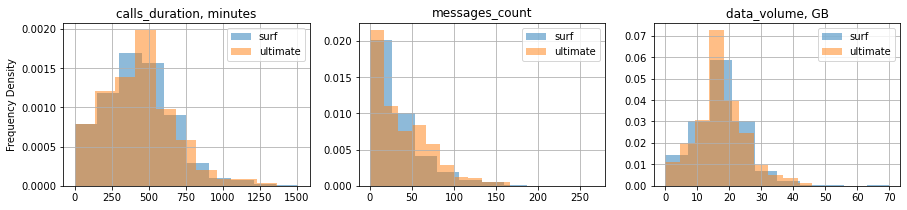

In [14]:
#function to plot several density plots in one line
def density_compare(features, description):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, (feature, descr) in enumerate(zip(features, description)):
        for name, group_data in data.groupby('plan'): 
            group_data[feature].hist(density=True, alpha=0.5, ax=axes[i%cols_num], label=name)
            axes[i%cols_num].set_title(feature + descr)
            axes[i%cols_num].legend()
    axes[0].set_ylabel('Frequency Density');

#Let's look at distribution of features corresponding to customer activities per month
print(BOLD + 'Frequency density of features corresponding to customer monthly activities by calling plans:' + END)
density_compare(activities, [', minutes', '', ', GB'])

The distributions of respective features corresponding to these customer activities for both calling plans does look simular.

Now, let us compare user requirements with the package limits.

Distribution of features corresponding to customer monthly activities by calling plans with the package limits:


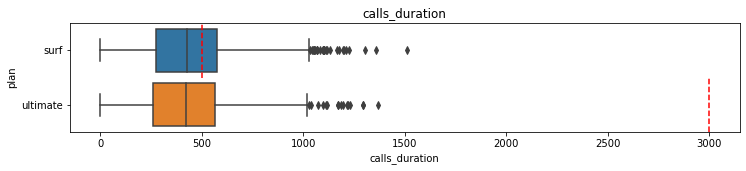

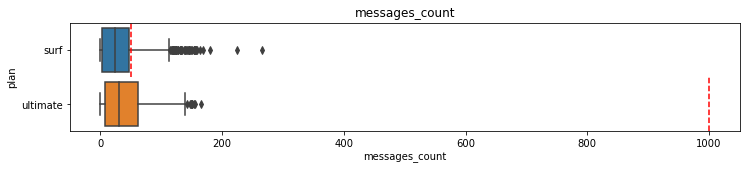

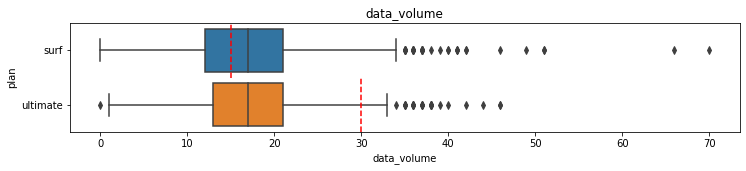

In [15]:
#creating dict to make it easier to get the package limits
plan_limits = {'calls_duration': 'minutes_included',
               'messages_count': 'messages_included', 
               'data_volume': 'gb_per_month_included'}


#function to plot several boxplots at once
def boxplot_compare(features):
    rows_num = len(features)
    for i, feature in enumerate(features):
        fig, ax = plt.subplots(figsize=(12, 2))
        sns.boxplot(y='plan', x=feature, data=data.sort_values('plan'), orient='h', ax=ax);
        ax.axvline(data_plans[data_plans.plan_name=='surf'][plan_limits[feature]].values[0],\
                                 ymin=0.5, ymax=1, color = 'r', linestyle='--')
        ax.axvline(data_plans[data_plans.plan_name=='ultimate'][plan_limits[feature]].values[0],\
                                 ymin=0, ymax=0.5, color = 'r', linestyle='--')
        ax.set_title(feature)

#plotting boxplots of features corresponding to customer activities per month by plans with plan limits
print(BOLD + 'Distribution of features corresponding to customer monthly activities '\
      + 'by calling plans with the package limits:' + END)
boxplot_compare(activities)

Surf package limits are higher than the average customers requirements for calls and messages. Internet limits alone do not cover the average customer needs. Accordingly, the telecom operator can receive additional revenue mainly only on the providing of additional mobile Internet, which is not included in the package.

Limitations of the Ultimate package cover the requirements of all users of this plan, with the exception of a small number of web traffic values that are far from the main sample. So, the revenue from this calling plan will rarely exceed the cost of this package - \\$70.

Thus, Surf prepaid plan brings in more revenue than Ultimate, if the user has spent more than $50 (the difference between the cost of these packages) for exceeding mostly mobile traffic (when more than 7GB was used). Exceeding other package limits is less likely and costs much less.

Now, let's take a look at users who regularly (half a year and more) and significantly exceed package limits of Surf plan,
i.e. their expenses exceed the cost of the calling plan by $ 50.


In [16]:
#calculating the number of users who exceed package limits and their ratio
surf_users_count = len(data[data.plan=='surf'].user_id.unique()) #all users
print('Number of customers who use the Surf calling plan:', surf_users_count)
print()
overspent_users_count = len(data[data.plan=='surf'].query('revenue-20>50').user_id.unique())
print('Number of customers who at least once exceeded the cost of the Surf plan by $ 50:',
      overspent_users_count, '- which is {:.1%}'.format(overspent_users_count/surf_users_count))
print()

#calculating the number of users who regularly and significantly exceed package limits and their ratio
#creating table of users who regularly exceed package limits with number of active and overspent months
signif_overspent_users = pd.DataFrame({'active_months_count': data[data.plan=='surf'].user_id.value_counts(),
              'avg_monthly_revenue': round(data[data.plan=='surf'].groupby('user_id').revenue.mean(), 2),
              'overspent_months_count': data[data.plan=='surf'].query('revenue-20>50').user_id.value_counts(),
              'overspent_months_percent': round((data[data.plan=='surf'].query('revenue-20>50')\
                                                    .user_id.value_counts()\
                                                /data[data.plan=='surf'].user_id.value_counts() * 100), 1)
}).dropna().query('overspent_months_count>5').sort_values('overspent_months_percent', ascending=False)\
    .rename_axis('user_id').reset_index()

#not all users used the operator's services during the entire year under consideration
long_active_surf_users_count = sum(data[data.plan=='surf'].user_id.value_counts()>5)
print('Number of customers who use the Surf calling plan and are active for half a year or more:',
      long_active_surf_users_count)
print()
print('Number of customers who regularly (half a year or more) exceed the cost of the Surf plan by $50:',
      len(signif_overspent_users),
      '- which is {:.1%}'.format(len(signif_overspent_users)/long_active_surf_users_count))
print()
print(BOLD + 'Customers who regularly (half a year or more) exceed the cost of Surf plan by $50:' + END)
display(signif_overspent_users)

Number of customers who use the Surf calling plan: 333

Number of customers who at least once exceeded the cost of the Surf plan by $ 50: 187 - which is 56.2%

Number of customers who use the Surf calling plan and are active for half a year or more: 119

Number of customers who regularly (half a year or more) exceed the cost of the Surf plan by $50: 16 - which is 13.4%

Customers who regularly (half a year or more) exceed the cost of Surf plan by $50:


,user_id,active_months_count,avg_monthly_revenue,overspent_months_count,overspent_months_percent
0,1147,8,199.35,8.0,100.0
1,1201,7,163.47,7.0,100.0
2,1223,6,97.44,6.0,100.0
3,1292,6,263.33,6.0,100.0
4,1359,11,145.56,10.0,90.9
5,1268,10,183.09,9.0,90.0
6,1328,9,133.84,8.0,88.9
7,1374,9,156.13,8.0,88.9
8,1009,8,109.83,7.0,87.5
9,1127,7,95.71,6.0,85.7


Quite a lot of customers of the Surf plan exceeded the package cost at least at once - 56% of them. But in order for the Surf plan brings in more revenue than the Ultimate plan, it is necessary that the customers regularly exceed the package limits. 13% of customers among those who use the operator's services for a long time exceed the package cost by $50 regularly (for six months or more). For those customers the Surf plan brings in more revenue. It makes sense to understand what distinguishes these customers from the rest, perhaps the age group, location, nature of calls, Internet resources they use. We need to look at such customers on the main sample and try to cluster them.

### Conclusion

The customers' behavior for both calling plans is quite similar. They talk on the phone an average of 7 hours, send 25-30 messages and spend an average 17 GB of mobile traffic per month.

The Surf package limits are higher than the average customer call and message requirements. Only Internet limits do not cover the needs of ordinary customers. Thus, the telecom operator can get additional revenue mainly by providing additional mobile Internet. The Ultimate package limits cover the requirements of almost all customers of this calling plan. So the revenue from the Ultimate calling plan will rarely exceed its cost. Thus, the Surf plan brings in more revenue than the Ultimate plan if the customer regularly spent more than the difference between the cost of these packages, mainly due to excess mobile traffic.

More than half of the customers of the Surf calling plan at least once exceeded the price of the package by \\$50 (the difference between the cost of the Surf and Ultimate packages). 13\% of customers who use the operator's services for a long time exceed the package cost by \\$50 on a regular basis. It makes sense to understand what distinguishes these customers from the rest and offer the Surf plan to a similar targitet audience since it brings in more revenue.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualisation of the data. Great that you combined both plans on one graph for the comparison and also used different graph types to check available data.
-  If you have time and willing to practice, you can display two charts (histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## 4. Analyzing the Revenue and Test the Hypotheses

Let us look at descriptive statistics and distribution of revenue by calling plans.

Desciptive statistics for monthly revenue by calling plans:
Surf


,count,min,max,mean,median,std,var
revenue,1573.0,20.0,590.4,60.7,40.4,55.4,3067.8



Ultimate


,count,min,max,mean,median,std,var
revenue,720.0,70.0,182.0,72.3,70.0,11.4,129.8



Distribution of monthly revenue by calling plans:


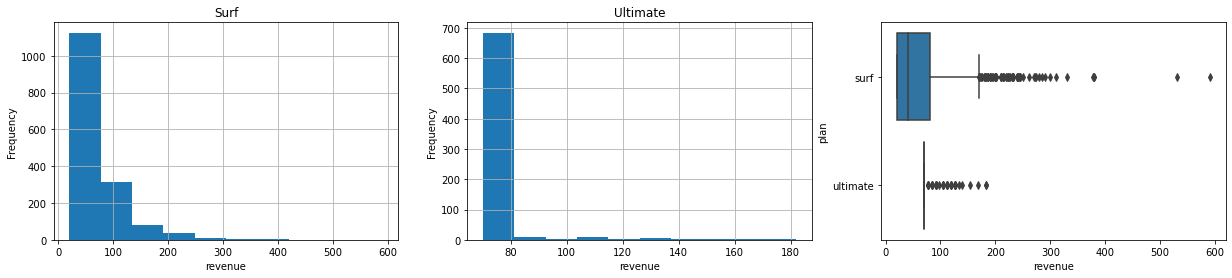

In [17]:
#printing the descriptive statistics of revenue by calling plans
print(BOLD + 'Desciptive statistics for monthly revenue by calling plans:' + END)
for name, group_data in data.groupby('plan'):
    print(BOLD + name.capitalize() + END)
    display(group_data[['revenue']].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
    print()

print(BOLD + 'Distribution of monthly revenue by calling plans:' + END)
fig, axes = plt.subplots(ncols=3, figsize=(7*3, 4))
for i, (name, group_data) in enumerate(data.groupby('plan')):
    group_data.revenue.hist(ax=axes[i%3])
    axes[i%3].set_title(name.capitalize())
    axes[i%3].set_ylabel('Frequency');
    axes[i%3].set_xlabel('revenue');
sns.boxplot(y='plan', x='revenue', data=data.sort_values('plan'), orient='h', ax=axes[2]);

The average monthly revenue from a Surf plan customer is \\$40 and \\$72 from a Ultimate plan customers. The minimum monthly revenue coincides with the package cost and is \\$20 and \\$70 for Surf and Ultimate plan customers respectively. The maximum revenue is \\$590 for Surf plan a customer and \\$180 from customers of the Ultimate calling plan. 

Mean of monthly revenue of Surf plan is greater than the median, which implies that there are outliers with large values. The monthly revenue of Ultimate plan has small variation, almost all values are \\$70.

The distribution of the Revenue random variable does not have the form of a normal distribution.

Now, let us formally test the hypothesis that the distribution of samples is normal. Here we will use Shapiro-Wilks normality tests.

Q-Q Plots for revenue of Surf and Ultimate plans:


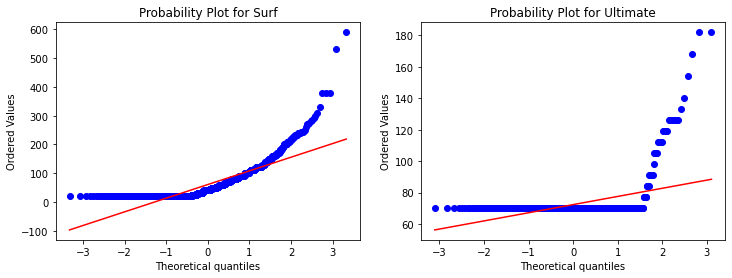

Shapiro-Wilk normality tests:
Hypotheses:
H₀: Revenue for Surf is distributed normally
H₁: Revenue for Surf is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0
We reject the hypothesis H₀

Hypotheses:
H₀: Revenue for Ultimate is distributed normally
H₁: Revenue for Ultimate is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0
We reject the hypothesis H₀



In [18]:
print(BOLD + 'Q-Q Plots for revenue of Surf and Ultimate plans:' + END)
fig, axes = plt.subplots(ncols=2, figsize=(6*2, 4))
for i, (name, group_data) in enumerate(data.groupby('plan')):
    st.probplot(group_data.revenue, dist="norm", plot=axes[i%2])
    axes[i%2].set_title('Probability Plot for ' + name.capitalize())
plt.show()

print(BOLD + 'Shapiro-Wilk normality tests:' + END)
alpha = 0.05
for name, group_data in data.groupby('plan'):
    print('Hypotheses:')
    print(BOLD + 'H\u2080: Revenue for ' + name.capitalize() + ' is distributed normally' + END)
    print(BOLD + 'H\u2081: Revenue for ' + name.capitalize() + ' is not distributed normally' + END)
    norn_pvalue = st.shapiro(group_data.revenue)[1]
    print("Shapiro-Wilk normality test, p-value: ", round(norn_pvalue, 4))
    if (norn_pvalue < alpha): 
        print("We reject the hypothesis H\u2080") 
    else: 
        print("We can't reject the hypothesis H\u2080") 
    print()

The distribution of revenue is most likely different from the normal one, since the points on the Q-Q graph do not lie on a straight line, but are described by a non-linear curve for Surf revenue and some of the points for Ultimate revenue lie very far from the straight line.

Shapiro-Wilk normality tests also reject the hypothesis H<sub>0</sub> that the distribution of samples is normal.

Thus, we can not use a parametric Student's t-test in order to compare the average revenue from users of Ultimate and Surf calling plans.

Now we need to test the hypothesis that the revenue from users of Ultimate and Surf calling plans are different. For this we will use the Mann-Whitney U Test.

The Mann-Whitney U test can be used to test whether there is a difference between two groups, and the data need not be normally distributed.To determine this difference, the rank sums of the two groups are used rather than the means as in the t-test for independent samples. The Mann-Whitney U test is thus the non-parametric counterpart to the t-test for independent samples; it is subject to less stringent requirements than the t-test. Therefore, the Mann-Whitney U test is always used when the requirement of normal distribution for the t-test is not met.

In [19]:
print(BOLD + 'Mann-Whitney U test:' + END)
alpha = 0.05
print('Hypotheses:')
print(BOLD 
      + 'H\u2080: Sample distributions of the revenue from customers of Ultimate and Surf calling plans are equal.'
      + END)
print(BOLD 
      +'H\u2081: Sample distributions of the revenue from customers of Ultimate and Surf calling plans are not equal.' 
      + END)
revenue_pvalue = st.mannwhitneyu(data[data.plan=='surf'].revenue, data[data.plan=='ultimate'].revenue,\
                                 alternative='two-sided')[1]
print("Mann-Whitney U test, p-value: ", round(revenue_pvalue, 4))
if (revenue_pvalue < alpha): 
    print("We reject the hypothesis H\u2080") 
else: 
    print("We can't reject the hypothesis H\u2080") 

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of the revenue from customers of Ultimate and Surf calling plans are equal.
H₁: Sample distributions of the revenue from customers of Ultimate and Surf calling plans are not equal.
Mann-Whitney U test, p-value:  0.0
We reject the hypothesis H₀


The Mann-Whitney U test rejects the null hypothesis about equality of revenue distributions of both calling plans. Thus, there is likely some difference between the samples. The median of the revenue from customers of Ultimate calling plan is \\$70. The median revenue from Surf customers is \\$40. The Ultimate plan brings in more revenue in average.

Now we are looking at the descriptive statictics and distribution of revenue from users in NY-NJ area and from users of other regions.

Desciptive statistics for monthly revenue from customers in New York - New Jersey area and others:
in New York - New Jersey area


,count,min,max,mean,median,std,var
revenue,377.0,20.0,280.0,59.9,51.8,43.5,1895.5


not in New York - New Jersey area


,count,min,max,mean,median,std,var
revenue,1916.0,20.0,590.4,65.2,70.0,47.2,2225.0



Distribution of monthly revenue from customers in New York - New Jersey area and in other regions:


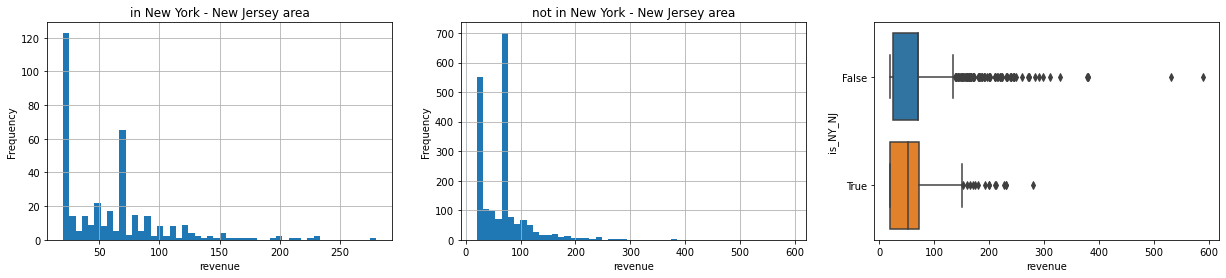

Share of Surf and Ultimate customers in New York - New Jersey area and in other regions:


plan,surf,ultimate
is_NY_NJ,,
False,0.658142,0.341858
True,0.827586,0.172414


In [20]:
#creating the corresponding lists of samples and their description
samples = [data[data.city.str.contains('NY-NJ')], data[~data.city.str.contains('NY-NJ')]]
sample_descriptions = ['in New York - New Jersey area',
                       'not in New York - New Jersey area']
#printing the descriptive statistics of revenue from users in NY-NJ area and others 
print(BOLD + 'Desciptive statistics for monthly revenue from customers in New York - New Jersey area and others:'
      + END)
for sample, descr in zip(samples, sample_descriptions):
    print(BOLD + descr + END)
    display(sample[['revenue']].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
print()


print(BOLD + 'Distribution of monthly revenue from customers in New York - New Jersey area and in other regions:' + END)
fig, axes = plt.subplots(ncols=3, figsize=(7*3, 4))
for i, (sample, descr) in enumerate(zip(samples, sample_descriptions)):
    sample.revenue.hist(ax=axes[i], bins=50)
    axes[i].set_ylabel('Frequency');
    axes[i].set_xlabel('revenue');
    axes[i].set_title(descr)
sns.boxplot(y='is_NY_NJ', x='revenue', orient='h', ax=axes[2],\
            data=data.assign(is_NY_NJ=['NY-NJ' in name for name in data.city]));
plt.show()

print(BOLD + 'Share of Surf and Ultimate customers in New York - New Jersey area and in other regions:' + END)
data.assign(is_NY_NJ=['NY-NJ' in name for name in data.city])\
    .pivot_table(index='is_NY_NJ', values='revenue', columns='plan', aggfunc='count')\
        .div(data.assign(is_NY_NJ=['NY-NJ' in name for name in data.city]).is_NY_NJ.value_counts().values, axis=0)

The median of monthly revenue from customers in New York - New Jersey area is \\$51 and \\$70 from others customers. The minimum monthly revenue coincides with the Surf package cost and is \\$20.

In all regions, customers choose Surf calling plan often, but in NY-NJ area people choose Surf plans much more often (see Share of Surf and Ultimate customers). And at the same time customers in NY-NJ area oft do not exceed the package limits (the bar on NY-NJ area histogram with value 20 is greater than the one with value 70, the bar on not NY-NJ area histogram with value 20 is less one with value 70).

The distribution of the Revenue of areas under consideration does not have the form of a normal distribution.

We will now formally test the hypothesis that the distribution of samples is normal using Shapiro-Wilks normality test.

Q-Q Plots for revenue from customers in New York - New Jersey area and from others regions:


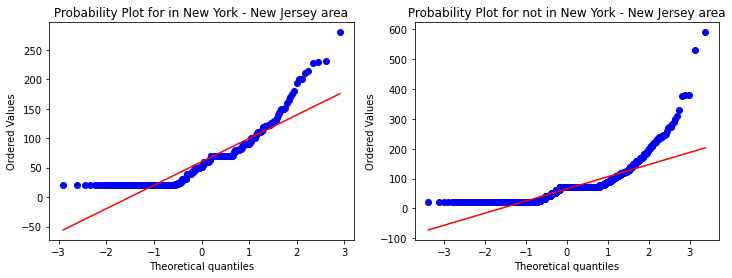

Shapiro-Wilk normality tests:
Hypotheses:
H₀: Revenue from customers in New York - New Jersey area is distributed normally
H₁: Revenue from customers in New York - New Jersey area is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0
We reject the hypothesis H₀

Hypotheses:
H₀: Revenue from customers not in New York - New Jersey area is distributed normally
H₁: Revenue from customers not in New York - New Jersey area is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0
We reject the hypothesis H₀



In [21]:
print(BOLD + 'Q-Q Plots for revenue from customers in New York - New Jersey area and from others regions:' + END)
fig, axes = plt.subplots(ncols=2, figsize=(6*2, 4))
for i, (sample, descr) in enumerate(zip(samples, sample_descriptions)):
    st.probplot(sample.revenue, dist="norm", plot=axes[i])
    axes[i].set_title('Probability Plot for ' + descr)
plt.show()

print(BOLD + 'Shapiro-Wilk normality tests:' + END)
alpha = 0.05
for sample, descr in zip(samples, sample_descriptions):
    print('Hypotheses:')
    print(BOLD + 'H\u2080: Revenue from customers ' + descr + ' is distributed normally' + END)
    print(BOLD + 'H\u2081: Revenue from customers ' + descr + ' is not distributed normally' + END)
    norn_pvalue = st.shapiro(sample.revenue)[1]
    print("Shapiro-Wilk normality test, p-value: ", round(norn_pvalue, 4))
    if (norn_pvalue < alpha): 
        print("We reject the hypothesis H\u2080") 
    else: 
        print("We can't reject the hypothesis H\u2080") 
    print()

The distribution of revenue of areas under consideration is most likely different from the normal one, since the points on the Q-Q graph do not lie on a straight line, but are described by a non-linear curves.

Shapiro-Wilk normality tests also reject the hypothesis H<sub>0</sub> that the distribution of samples is normal.

Thus, we can not use a parametric Student's t-test in order to compare the average revenue from customers in areas under consideration.

Let's test the hypothesis that the revenue from users in NY-NJ area is different from that of the users from other regions using the Mann-Whitney U test.

In [22]:
print(BOLD + 'Mann-Whitney U test:' + END)
alpha = 0.05
print('Hypotheses:')
print(BOLD + 'H\u2080: Sample distributions of the revenue from customers in New York - New Jersey area')
print(BOLD + '    and the revenue from customers from other regions are equal.'+ END)
print(BOLD +'H\u2081: Sample distributions of the revenue from customers in New York - New Jersey area')
print(BOLD +  '    and the revenue from customers from other regions are not equal.' + END)
revenue_pvalue = st.mannwhitneyu(data[data.city.str.contains('NY-NJ')].revenue,
                                 data[~data.city.str.contains('NY-NJ')].revenue,
                                 alternative='two-sided')[1]
print("Mann-Whitney U test, p-value: ", round(revenue_pvalue, 4))
if (revenue_pvalue < alpha): 
    print("We reject the hypothesis H\u2080") 
else: 
    print("We can't reject the hypothesis H\u2080") 

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of the revenue from customers in New York - New Jersey area
    and the revenue from customers from other regions are equal.
H₁: Sample distributions of the revenue from customers in New York - New Jersey area
    and the revenue from customers from other regions are not equal.
Mann-Whitney U test, p-value:  0.0039
We reject the hypothesis H₀


The Mann-Whitney U test rejects the null hypothesis about equality of distributions of revenue from customers in areas under consideration. Thus, there is likely some difference between the samples. The median of monthly revenue from customers in New York - New Jersey area is \\$51 and \\$70 from customers from other region. Not NY-NJ area customers bring in more revenue due to the fact that they more often choose the Ultimate calling plan and if they choose the Surf calling plan, they more often exceed the package limits. Perhaps the region is a sign of distinguishing customers who are more likely to exceed package limits.

### Conclusion

The null hypothesis that the revenue from customers of Ultimate and Surf calling plans are equal against the two-sided alternative is rejected at the 5% significance level using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality. The median of the revenue from customers of Ultimate calling plan is \\$70. The median revenue from Surf customers is \\$40. The Ultimate plan brings in more revenue in average.

The null hypothesis that the revenue from customers in NY-NJ area is equal to that of the customers from other regions against the two-sided alternative is rejected at the 5% significance level, again using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality, yet again. The median of monthly revenue from customers in NY-NJ area is \\$51 and \\$70 from customers from other regions. Not NY-NJ area customers bring in more revenue due to the fact that they more often choose the Ultimate calling plan and if they choose the Surf calling plan, they more often exceed the package limits.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall amazing job! Hypotheses have been formulated and tested correctly.
- Great that you used multiple ways to check normality.

## 5. Overall Conclusion

We got the data from the telecom operator, 'Megaline', on 500 clients to further assess analyze clients' behavior and determine which prepaid plan brings in more revenue.

Before proceeding to the analysis, the data was preprocessed:

- After a general review of the data revealed:
    - column corresponding to churn date contains mostly only unknown values, which correspond to the fact that the client has not stopped using the operator's services.
    - There is a large percent of missed calls and many sessions with zero traffic. It makes sense to check the coverage of network for clients or identify possible reasons of this.
- The some datatypes had to be converted to appropriate ones.
- For further analysis, monthly data on calls, text messages and the volume of web traffic for each client and also monthly revenue were calculated.

During the preliminary analysis of the plans, it turned out that:

- Most of the clients have the Surf calling plan (68%).
- The customers' behavior for both calling plans is quite similar.
- The Surf package limits are higher than the average customer call and message requirements. Only Internet limits do not cover the needs of ordinary customers. The telecom operator can get additional revenue mainly by providing additional mobile Internet.
- The Ultimate package limits cover the requirements of almost all customers of this calling plan. The revenue from the Ultimate calling plan will rarely exceed its cost.
- Some customers of the Surf calling plan significantly exceed the package cost by \\$50 on a regular basis. From these clients the Surf plan brings in more revenue than the Ultimate plan.

Recommendations for the commercial department:

- User Acquisition
    - Offer the Surf calling plan to targeted audience who tend to exceed the package limits. Additional analysis is requared to identify what distinguishes these clients from the rest (The region can be such a sign, since not NY-NJ area customers bring in more revenue due to the fact that they more often exceed the package limits of Surf calling plan).
    - Offer the Ultimate calling plan to rest targeted audience, since the Ultimate plan brings in more revenue in average. The average difference is $30. This difference should be taken into account considering the cost of user acquisition for different calling plans and adjusting the advertising budget. Most likely, it is easier to offer the Ultimate calling plan to the target audience not from New York - New Jersey area, since they choose this plan more often.
- Working with subscribed clients
    - Offer to upgrade to Ultimate calling plan for customers who occasionally exceed the package limits of Surf calling plan.
    - Do not offer upgrade to Ultimet for customers who regularly significantly exceed the package limits of Surf calling plan.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
 
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions. It is very structured and provides insights about what you accomplished and recommendations to the business.